# Quantum Noise Synth

Consider a tunnel junction with with a voltage bias V(t).


We define a normalized bias voltage in units of kelvin as follows:
$$
v(t) = \frac{eV(t)}{2k_B}
$$

We define an inegrated noise power output in units of kelvin as follows:

$$
p(t) = \frac{1}{G}\int^{f_{mw} + B/2}_{f_{mw} - B/2} S_I(f)df,
$$

where $S_I(f)$ is the current spectral density, $f_{mw}$ is the microwave frequency, typically in the GHz range, B is the bandwidth, f is frequency, and G is a gain factor which has units of volts per kelvin, translating the output noise power signal into kelvin units.  

The tunnel junction can be thought of a synth module which translates a signal v(t) in temperature units into another signal p(t) also in temperature units.  The schematic for this experiment as as follows:

![](../schematics/schematic2.svg)

If the DC voltage on the device is always zero, we can couple the audio signal v(t) in using a capacitor, and shunt the junction to ground with a bias resistor on the other side of a broadband RF inductor which blocks all microwave signals. This full circuit, with about a divide by 1000 at 440 Hz is as follows:

![](../schematics/schematic1.svg)


In [8]:
# Calculate imaginary impedance of input inductor:

f_mw = 10.0e9 #Hz
L_in = 8e-6 # Henries
print("omega*L in ohms at 10 GHz:")
print(2*3.14159*L_in*f_mw)
f_mw = 1.0e9 #Hz
print("omega*L  in ohms at 1 GHz:")
print(2*3.14159*L_in*f_mw)

f_audio = 10.0e3 #Hz
print("omega*L in ohms at 10 kHz:")
print(2*3.14159*L_in*f_audio)
f_audio = 1.0e3 #Hz
print("omega*L  in ohms at 1 kHz:")
print(2*3.14159*L_in*f_audio)

omega*L in ohms at 10 GHz:
502654.39999999997
omega*L  in ohms at 1 GHz:
50265.439999999995
omega*L in ohms at 10 kHz:
0.5026544
omega*L  in ohms at 1 kHz:
0.050265439999999995


In [11]:
# Calculate imaginary impedance of input capactior:

C_in = 7.5e-9 #Farads

f_audio = 10.0e3 #Hz
print("1/omega*C in ohms at 10 kHz:")
print(1/(2*3.14159*C_in*f_audio))
f_audio = 1.0e3 #Hz
print("1/omega*C in ohms at 1 kHz:")
print(1/(2*3.14159*C_in*f_audio))
f_audio = 440 #Hz
print("1/omega*C in ohms at 440 Hz:")
print(1/(2*3.14159*C_in*f_audio))
f_audio = 60 #Hz
print("1/omega*C in ohms at 60 Hz:")
print(1/(2*3.14159*C_in*f_audio))

1/omega*C in ohms at 10 kHz:
2122.067700325844
1/omega*C in ohms at 1 kHz:
21220.67700325844
1/omega*C in ohms at 440 Hz:
48228.811371041906
1/omega*C in ohms at 60 Hz:
353677.9500543073


We define the function 

$$
\Phi(\phi) \equiv \phi\coth{\phi}, 
$$

and write the theoretical noise power out as 

$$
p(t) = z\eta(t) + T_N + T\Phi\left(\frac{v(t) + y}{T}\right) + T\Phi\left(\frac{v(t) - y}{T}\right),
$$

where $T_N$ is the noise temperature of the whole measurement system in kelvin, T is the physical temperature in kelvin, z is a fluctuation amplitude in kelvin, $\eta(t)$ is a Gaussian noise source of amplitude 1, and y is the microwave frequency converted to kelvin with the following definition:

$$
y \equiv \frac{hf_{mw}}{2k_B},
$$

where $k_B$ is the Boltzmann constant.

The voltage bias in temperature units v(t) consists of a cosine wave of audio frequency $f_{audio}$ swept in amplitude from zero to a maximum value x over a sweep time $t_{sweep}$.  

$$
v(t) = x\theta(t)\cos{(2\pi f_{audio}t)},
$$

where the sawtooth function $\theta(t)$ ramps from zero to 1 over a time $t_{sweep}$.

In [133]:
def Phi(x):    
    return (x) / np.tanh(x + 0.000001)
    
def p(v,y,T_N,T):
    return T_N + T*Phi((v + y)/T) + T*Phi((v - y)/T)

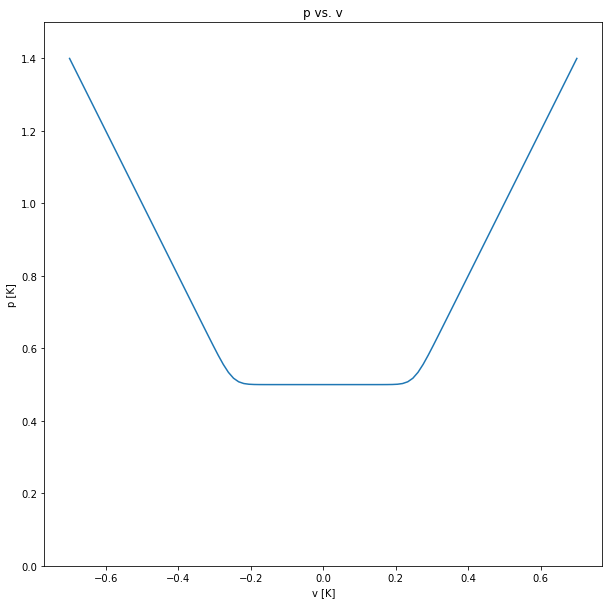

In [115]:
# Plot p(v) 

import matplotlib.pyplot as plt
import numpy as np

T_N = 0
T = 0.02
y = 0.25

v_values = np.linspace(-0.7, 0.7,100)
p_values = p(v_values,y,T_N,T)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plt.plot(v_values, p_values)
    
plt.xlabel('v [K]')
plt.ylabel('p [K]')
plt.title('p vs. v')
plt.ylim(0, 1.5)
plt.show()

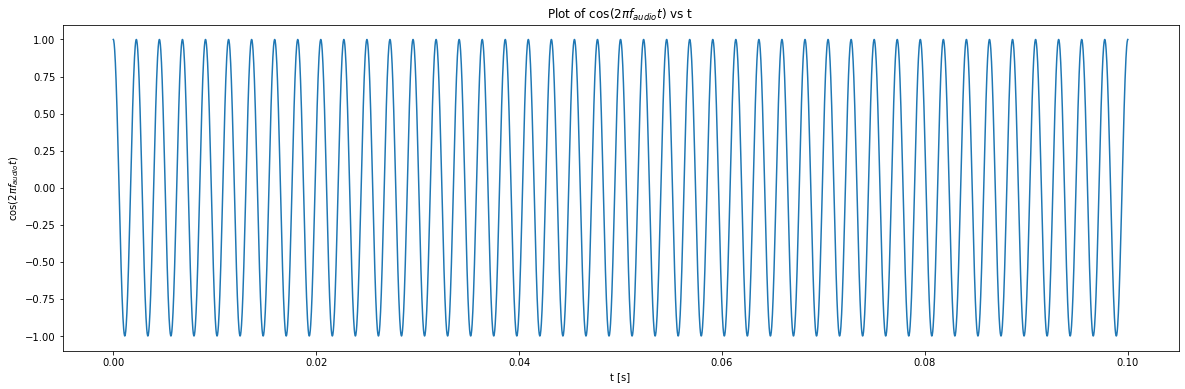

In [31]:
# Plot cosine at audio frequency

import matplotlib.pyplot as plt
import numpy as np

f_audio = 440 # Hz
sample_rate = 100*f_audio #samples per second
sample_time = 0.1 # seconds

# time values

t_values = np.linspace(0, sample_time,int(sample_rate*sample_time))
v_values = np.cos(2*np.pi*f_audio*t_values)
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(6)

#v_values = t_values + t_values
                       
plt.plot(t_values, v_values)
    
plt.xlabel('t [s]')
plt.ylabel('$\cos{(2\pi f_{audio} t)}$')
plt.title('Plot of $\cos{(2\pi f_{audio} t)}$ vs t')
#plt.ylim(0, 1.5)
plt.show()

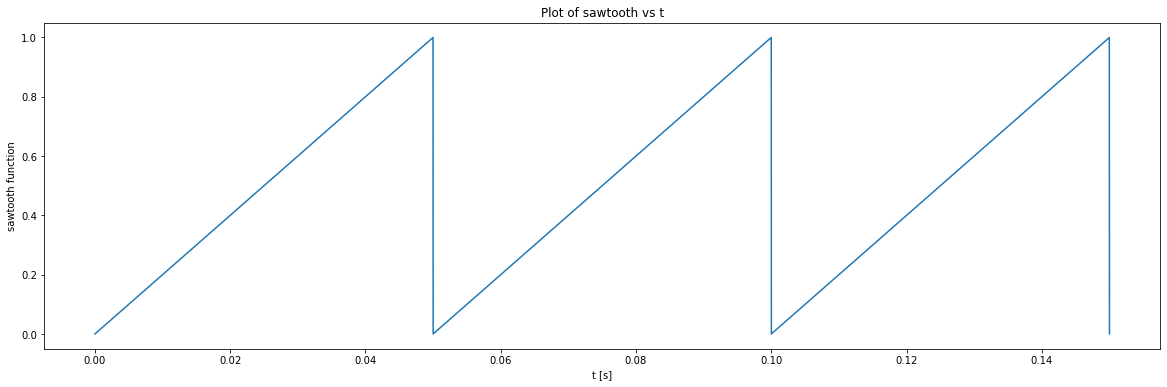

In [36]:
# Plot ramp 

import matplotlib.pyplot as plt
import numpy as np

f_audio = 440 # Hz

sample_rate = 100*f_audio #samples per second
sample_time = 0.15 # seconds
t_sweep = 0.05 # seconds
n_sweep = int(t_sweep*sample_rate) # number of points in a sweep

t_values = np.linspace(0, sample_time,int(sample_rate*sample_time))

v_values = (t_values%n_sweep)
v_values = ((t_values*sample_rate)%n_sweep)/n_sweep

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(6)

#v_values = t_values + t_values
                       
plt.plot(t_values, v_values)
    
plt.xlabel('t [s]')
plt.ylabel('sawtooth function')
plt.title('Plot of sawtooth vs t')
#plt.ylim(0, 1.5)
plt.show()

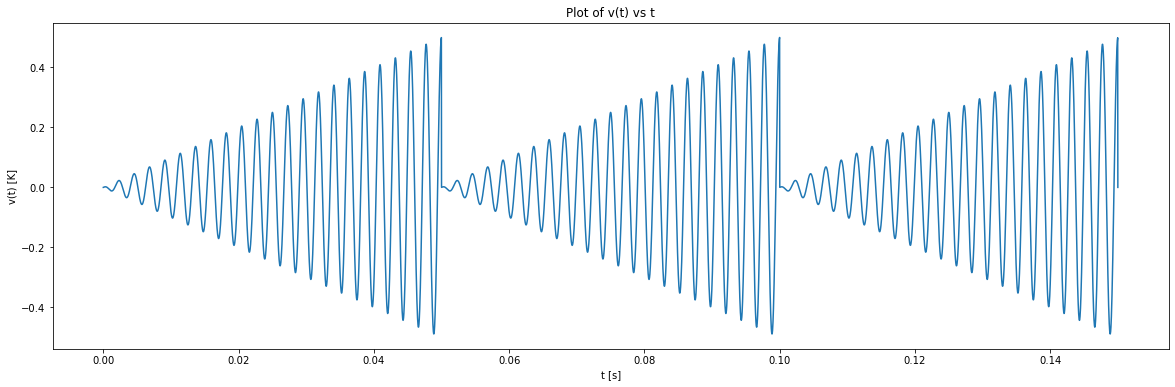

In [118]:
# Plot bias input signal x

import matplotlib.pyplot as plt
import numpy as np

f_audio = 440 # Hz
x = 0.5

sample_rate = 100*f_audio #samples per second
sample_time = 0.15 # seconds
t_sweep = 0.05 # seconds
n_sweep = int(t_sweep*sample_rate) # number of points in a sweep


t_values = np.linspace(0, sample_time,int(sample_rate*sample_time))
v_values = (t_values%n_sweep)
v_values = x*np.cos(2*np.pi*f_audio*t_values)*((t_values*sample_rate)%n_sweep)/n_sweep

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(6)

#v_values = t_values + t_values
                       
plt.plot(t_values, v_values)
    
plt.xlabel('t [s]')
plt.ylabel('v(t) [K]')
plt.title('Plot of v(t) vs t')
#plt.ylim(0, 1.5)

plt.show()

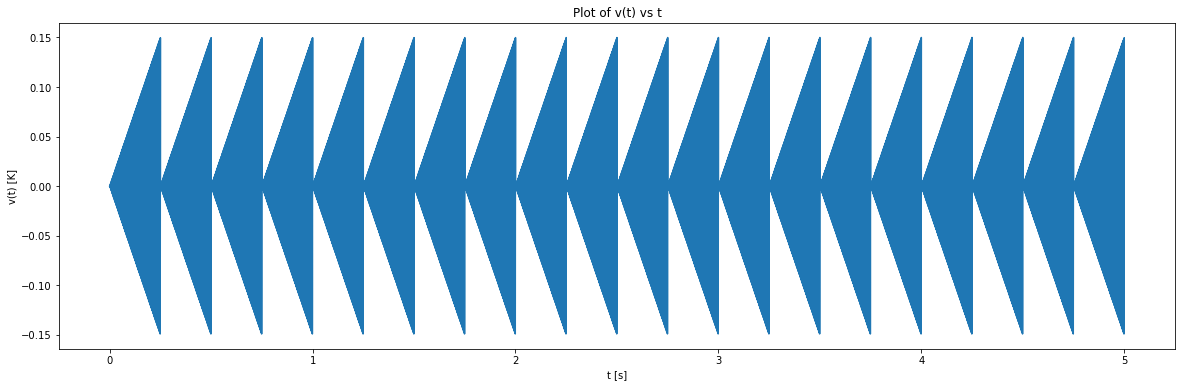

In [125]:
# Plot bias input signal x

import matplotlib.pyplot as plt
import numpy as np

f_audio = 440 # Hz
x = 0.15

sample_rate = 100*f_audio #samples per second
sample_time = 5 # seconds
t_sweep = 0.25 # seconds
n_sweep = int(t_sweep*sample_rate) # number of points in a sweep


t_values = np.linspace(0, sample_time,int(sample_rate*sample_time))
v_values = (t_values%n_sweep)
v_values = x*np.cos(2*np.pi*f_audio*t_values)*((t_values*sample_rate)%n_sweep)/n_sweep

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(6)

#v_values = t_values + t_values
                       
plt.plot(t_values, v_values)
    
plt.xlabel('t [s]')
plt.ylabel('v(t) [K]')
plt.title('Plot of v(t) vs t')
#plt.ylim(0, 1.5)

plt.show()
from scipy import signal
from scipy.io import wavfile
from IPython.display import Audio

audio = Audio(data=v_values, rate=sample_rate)
display(audio)

In [108]:
def Phi(x):    
    return (x) / np.tanh(x + 0.000001)
    
def p(v,y,T_N,T):
    return T_N + T*Phi((v + y)/T) + T*Phi((v - y)/T)

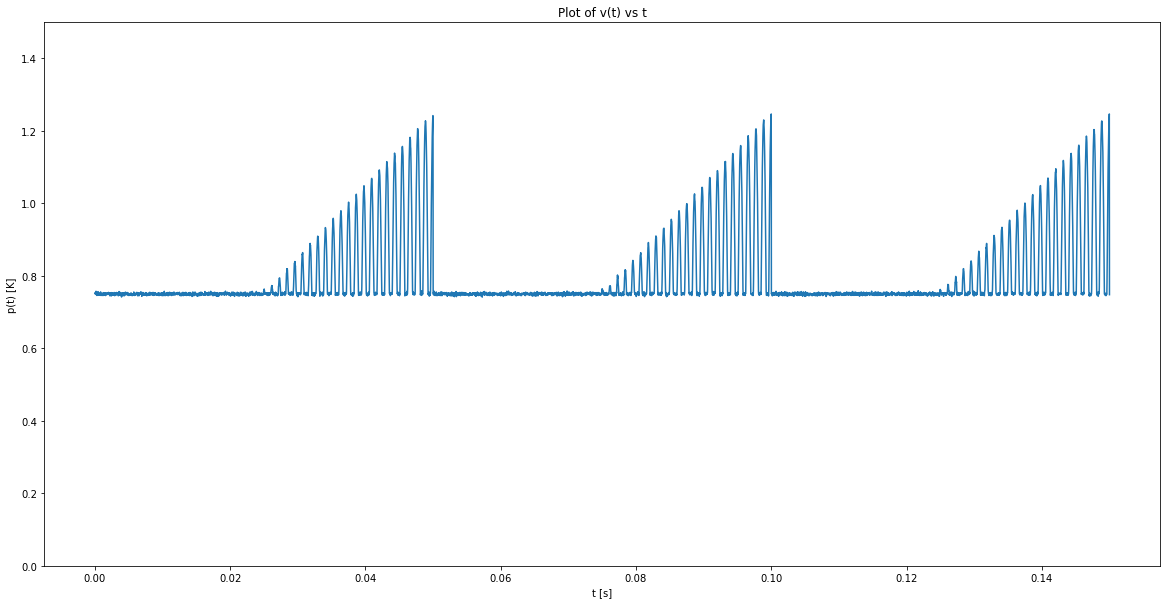

In [134]:
# Plot bias input signal x

import matplotlib.pyplot as plt
import numpy as np

f_audio = 440 # Hz
x = 0.5

sample_rate = 100*f_audio #samples per second
sample_time = 0.15 # seconds
t_sweep = 0.05 # seconds
n_sweep = int(t_sweep*sample_rate) # number of points in a sweep

y = 0.25 # 0.25 K is about 10 GHz
z = 0.05 # power fluctuation amplitude in kelvin
T_N = 0.25 # noise temperature in kelvin
T = 0.01 # temperature in kelvin

t_values = np.linspace(0, sample_time,int(sample_rate*sample_time))
v_values = (t_values%n_sweep)
v_values = x*np.cos(2*np.pi*f_audio*t_values)*((t_values*sample_rate)%n_sweep)/n_sweep
eta = z*np.random.normal(loc=0, scale=1, size=len(t_values))

p_values =  z*eta + p(v_values,y,T_N,T)

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)

#v_values = t_values + t_values
                       
plt.plot(t_values, p_values)
    
plt.xlabel('t [s]')
plt.ylabel('p(t) [K]')
plt.title('Plot of v(t) vs t')
plt.ylim(0, 1.5)
plt.show()

We now integrate the signal p(t) to get a root mean square of the audio signal q(t) as follows:

$$
q(t) = \frac{1}{F}\sqrt{\int^t_{t - \frac{1}{f_{audio}}}p^2(t)dt},
$$

where F is a gain in units of volts per kelvin


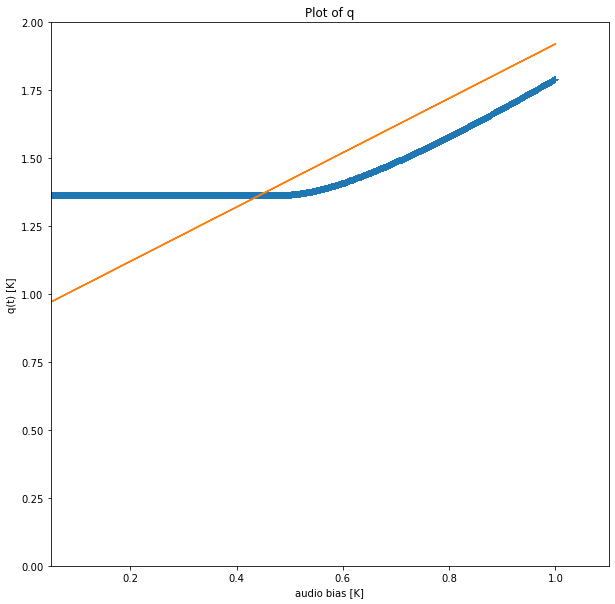

In [110]:
# Plot bias input signal x

import matplotlib.pyplot as plt
import numpy as np

f_audio = 2600 # Hz
x = 0.5

sample_rate = 100*f_audio #samples per second
sample_time = 0.15 # seconds
t_sweep = 0.05 # seconds
n_sweep = int(t_sweep*sample_rate) # number of points in a sweep

y = 0.25 # 0.25 K is about 10 GHz
z = 0.0 # power fluctuation amplitude in kelvin
T_N = 0.25 # noise temperature in kelvin
T = 0.01 # temperature in kelvin

t_values = np.linspace(0, sample_time,int(sample_rate*sample_time))
v_values = (t_values%n_sweep)
v_values = x*np.cos(2*np.pi*f_audio*t_values)*((t_values*sample_rate)%n_sweep)/n_sweep
sawtooth_values = ((t_values*sample_rate)%n_sweep)/n_sweep

eta = z*np.random.normal(loc=0, scale=1, size=len(t_values))

p_values =  z*eta + p(v_values,y,T_N,T)

n_integral = int(sample_rate/f_audio)

q_values = np.zeros_like(p_values)  # create an empty array to hold the result
for i in range(len(p_values) - n_integral + 1):
    q_values[i + n_integral - 1] = np.sqrt(np.sum(p_values[i:i+n_integral]**2))

F = 5.5
q_values = q_values/F
    
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

#v_values = t_values + t_values
                       
plt.plot(sawtooth_values,q_values,"+",sawtooth_values,.92 + sawtooth_values)
    
plt.xlabel('audio bias [K]')
plt.ylabel('q(t) [K]')
plt.title('Plot of q')
plt.ylim(0, 2.0)
plt.xlim(0.05, 1.1)

plt.show()

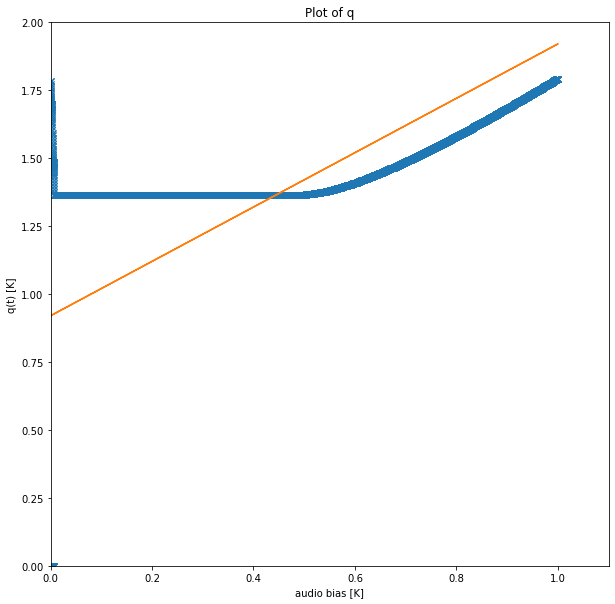

In [111]:
# Plot bias input signal x

import matplotlib.pyplot as plt
import numpy as np

f_audio = 2600 # Hz
x = 0.5

sample_rate = 100*f_audio #samples per second
sample_time = 0.15 # seconds
t_sweep = 0.05 # seconds
n_sweep = int(t_sweep*sample_rate) # number of points in a sweep

y = 0.25 # 0.25 K is about 10 GHz
z = 0.0 # power fluctuation amplitude in kelvin
T_N = 0.25 # noise temperature in kelvin
T = 0.01 # temperature in kelvin

t_values = np.linspace(0, sample_time,int(sample_rate*sample_time))
v_values = (t_values%n_sweep)
v_values = x*np.cos(2*np.pi*f_audio*t_values)*((t_values*sample_rate)%n_sweep)/n_sweep
sawtooth_values = ((t_values*sample_rate)%n_sweep)/n_sweep

eta = z*np.random.normal(loc=0, scale=1, size=len(t_values))

p_values =  z*eta + p(v_values,y,T_N,T)

n_integral = int(sample_rate/f_audio)

q_values = np.zeros_like(p_values)  # create an empty array to hold the result
for i in range(len(p_values) - n_integral + 1):
    q_values[i + n_integral - 1] = np.sqrt(np.sum(p_values[i:i+n_integral]**2))

F = 5.5
q_values = q_values/F
    
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

#v_values = t_values + t_values
                       
plt.plot(sawtooth_values,q_values,'x',sawtooth_values,.92 + sawtooth_values)
    
plt.xlabel('audio bias [K]')
plt.ylabel('q(t) [K]')
plt.title('Plot of q')
plt.ylim(0, 2.0)
plt.xlim(0, 1.1)

plt.show()

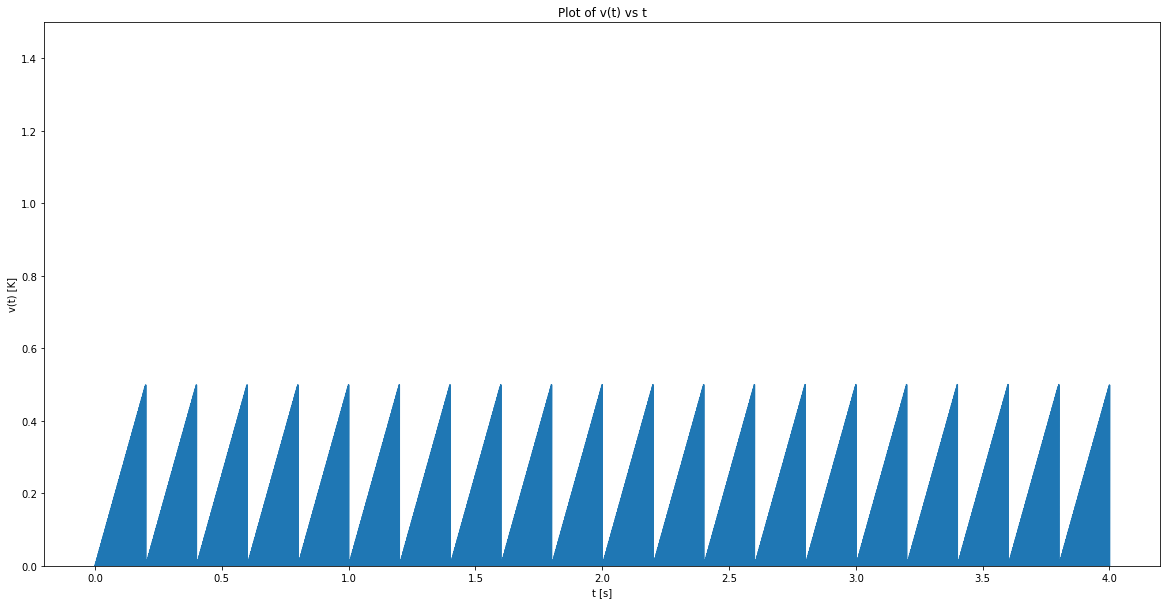

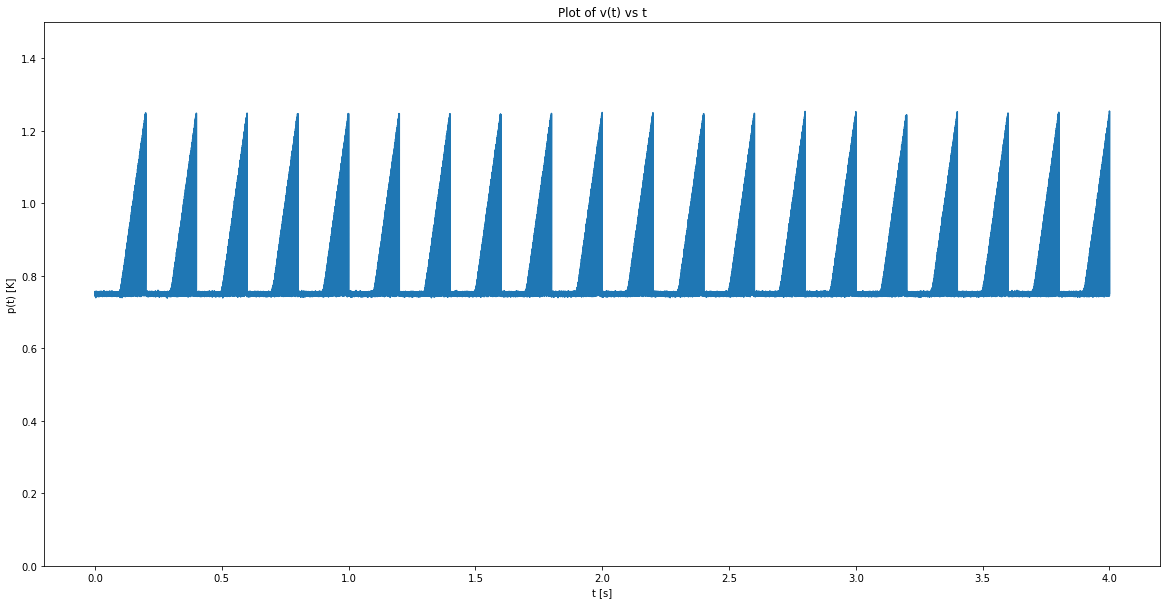

In [141]:
# Plot bias input signal x

import matplotlib.pyplot as plt
import numpy as np

f_audio = 440 # Hz
x = 0.5

sample_rate = 100*f_audio #samples per second
sample_time = 4 # seconds
t_sweep = 0.2 # seconds
n_sweep = int(t_sweep*sample_rate) # number of points in a sweep

y = 0.25 # 0.25 K is about 10 GHz
z = 0.05 # power fluctuation amplitude in kelvin
T_N = 0.25 # noise temperature in kelvin
T = 0.01 # temperature in kelvin

t_values = np.linspace(0, sample_time,int(sample_rate*sample_time))
v_values = (t_values%n_sweep)
v_values = x*np.cos(2*np.pi*f_audio*t_values)*((t_values*sample_rate)%n_sweep)/n_sweep
eta = z*np.random.normal(loc=0, scale=1, size=len(t_values))

p_values =  z*eta + p(v_values,y,T_N,T)



f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)

#v_values = t_values + t_values
                       
plt.plot(t_values, v_values)
    
plt.xlabel('t [s]')
plt.ylabel('v(t) [K]')
plt.title('Plot of v(t) vs t')
plt.ylim(0, 1.5)
plt.show()

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
                       
plt.plot(t_values, p_values)
    
plt.xlabel('t [s]')
plt.ylabel('p(t) [K]')
plt.title('Plot of v(t) vs t')
plt.ylim(0, 1.5)
plt.show()



audio = Audio(data=v_values, rate=sample_rate)
display(audio)

audio = Audio(data=p_values, rate=sample_rate)
display(audio)



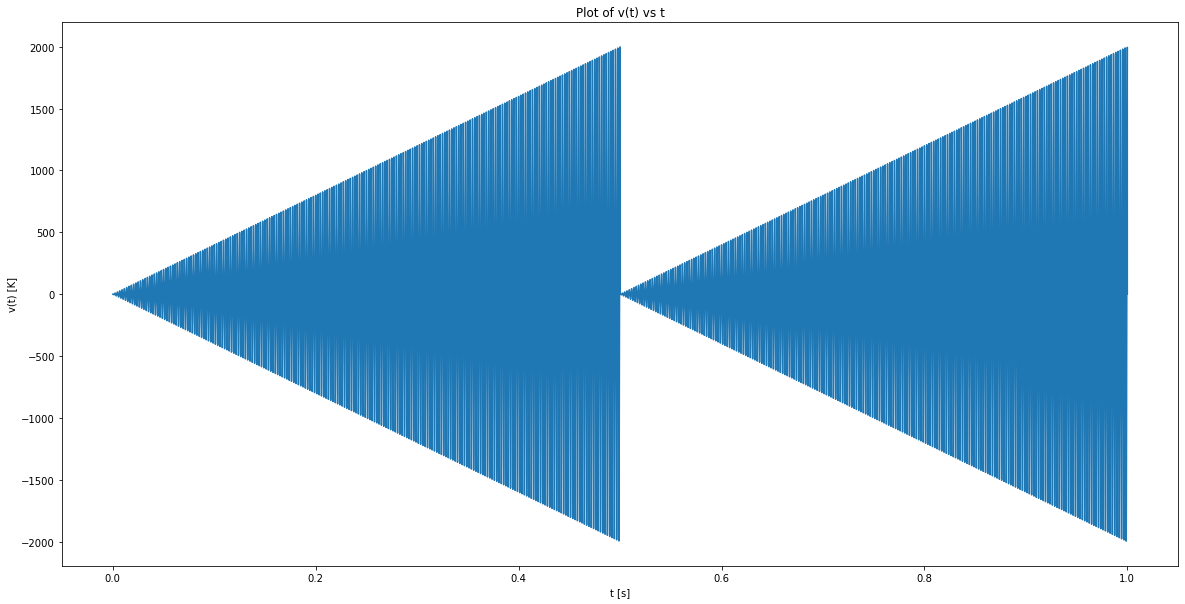

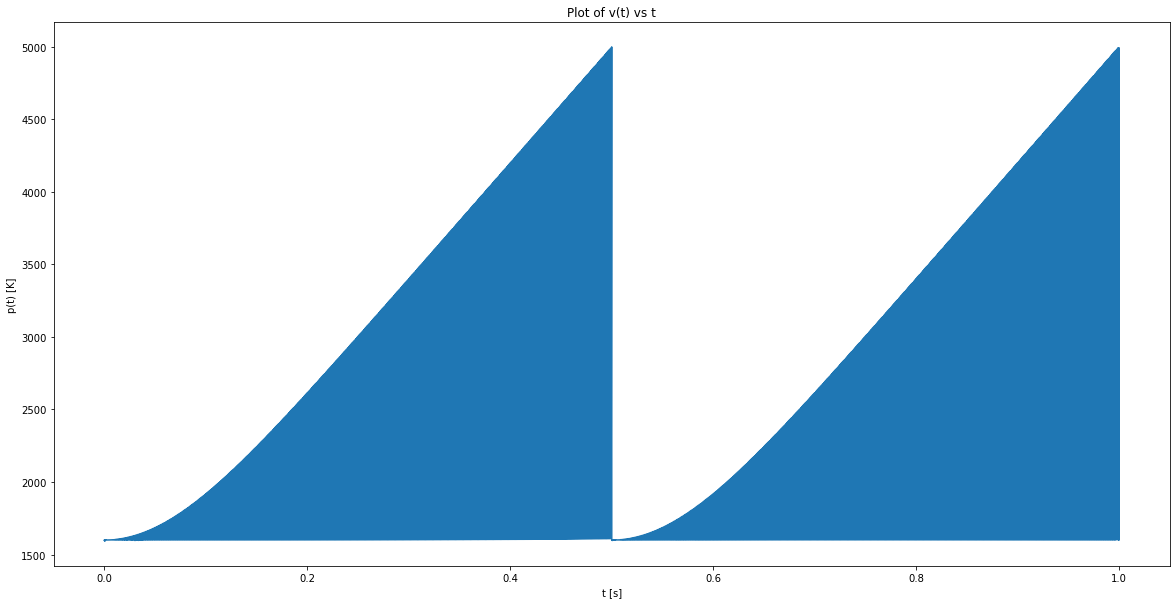

In [152]:
# room temperature measurement:

import matplotlib.pyplot as plt
import numpy as np

f_audio = 440 # Hz

sample_rate = 100*f_audio #samples per second
sample_time = 1 # seconds
t_sweep = 0.5 # seconds
n_sweep = int(t_sweep*sample_rate) # number of points in a sweep

x = 2000
y = 0.25 # 0.25 K is about 10 GHz
z = 0.05 # power fluctuation amplitude in kelvin
T_N = 1000 # noise temperature in kelvin
T = 300 # temperature in kelvin

t_values = np.linspace(0, sample_time,int(sample_rate*sample_time))
v_values = (t_values%n_sweep)
v_values = x*np.cos(2*np.pi*f_audio*t_values)*((t_values*sample_rate)%n_sweep)/n_sweep
eta = z*np.random.normal(loc=0, scale=1, size=len(t_values))

p_values =  z*eta + p(v_values,y,T_N,T)



f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)

#v_values = t_values + t_values
                       
plt.plot(t_values, v_values)
    
plt.xlabel('t [s]')
plt.ylabel('v(t) [K]')
plt.title('Plot of v(t) vs t')
plt.show()

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
                       
plt.plot(t_values, p_values)
    
plt.xlabel('t [s]')
plt.ylabel('p(t) [K]')
plt.title('Plot of v(t) vs t')
plt.show()



audio = Audio(data=v_values, rate=sample_rate)
display(audio)

audio = Audio(data=p_values, rate=sample_rate)
display(audio)

